In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from ucimlrepo import fetch_ucirepo, list_available_datasets #Import ucidatasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from matplotlib import pyplot as plt

C:\Users\Drewn\AppData\Local\Temp\ipykernel_30936\3500727478.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
# data  
X = adult.data.features 
y = adult.data.targets 
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

y = np.ravel(y)
X = pd.get_dummies(X)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state=12)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=7, max_depth=8, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.561
Accuracy score (validation): 0.553
Learning rate:  0.075
Accuracy score (training): 0.573
Accuracy score (validation): 0.562
Learning rate:  0.1
Accuracy score (training): 0.583
Accuracy score (validation): 0.569
Learning rate:  0.25
Accuracy score (training): 0.624
Accuracy score (validation): 0.575
Learning rate:  0.5
Accuracy score (training): 0.652
Accuracy score (validation): 0.577
Learning rate:  0.75
Accuracy score (training): 0.663
Accuracy score (validation): 0.569
Learning rate:  1
Accuracy score (training): 0.669
Accuracy score (validation): 0.558


In [12]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=.5, max_features=7, max_depth=8, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[6602  309  426   43]
 [3111  417  226   21]
 [ 843   46 1367  128]
 [ 402   38  611   63]]
Classification Report
              precision    recall  f1-score   support

       <=50K       0.60      0.89      0.72      7380
      <=50K.       0.51      0.11      0.18      3775
        >50K       0.52      0.57      0.55      2384
       >50K.       0.25      0.06      0.09      1114

    accuracy                           0.58     14653
   macro avg       0.47      0.41      0.38     14653
weighted avg       0.54      0.58      0.51     14653



<module 'matplotlib.pyplot' from 'C:\\Users\\Drewn\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

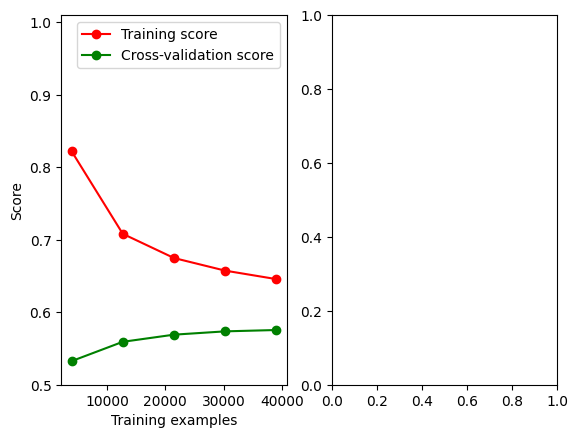

In [13]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(gb_clf2, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))